# 🔥Forest-Fire Detection using Deep Learning

This notebook presents a deep learning-based approach to classify wildfire images using a CNN model. We will go through data preprocessing, model development, training, evaluation, and prediction steps.

## 📌 Introduction

Forest fires are a major environmental concern, causing irreparable damage to ecosystems, wildlife, and human settlements. Early detection plays a crucial role in minimizing their impact. This project leverages the power of deep learning and image classification to detect signs of forest fires from visual data.

## 🎯 Project Objective

The objective of this project is to develop a deep learning-based image classifier that can distinguish between images **with fire** and **without fire**. The classifier is trained on a curated dataset of wildfire images and evaluated using various performance metrics.

## 🗃️ Dataset

- **Dataset Source:** [The Wildfire Dataset](https://www.kaggle.com/datasets/elmadafri/the-wildfire-dataset) from Kaggle  
- **Categories:**
  - 🔥 **Fire** — Images containing visible forest fires  
  - 🌲 **NoFire** — Images with no fire present  

## 🧠 Methodology

- Dataset loading from Kaggle using `KaggleHub`
- Image preprocessing and augmentation
- Building a Convolutional Neural Network (CNN) model
- Training and validating the model
- Evaluating performance using accuracy, confusion matrix, and classification report

## 🛠️ Technologies Used

- Python
- TensorFlow / Keras
- Matplotlib & Seaborn (for visualizations)
- KaggleHub (for dataset access)
- NumPy & Pandas

## Step 1: Import Necessary Libraries
This section imports all the required libraries.

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("elmadafri/the-wildfire-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/the-wildfire-dataset


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [3]:
import os

# Show downloaded dataset path
print("Dataset downloaded to:", path)

# Explore all folders & subfolders to find Train/Test
for root, dirs, files in os.walk(path):
    print("📁", root)
    for d in dirs:
        print("   └──", d)

Dataset downloaded to: /kaggle/input/the-wildfire-dataset
📁 /kaggle/input/the-wildfire-dataset
   └── the_wildfire_dataset_2n_version
📁 /kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version
   └── val
   └── test
   └── train
📁 /kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/val
   └── nofire
   └── fire
📁 /kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/val/nofire
📁 /kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/val/fire
📁 /kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test
   └── nofire
   └── fire
📁 /kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test/nofire
📁 /kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test/fire
📁 /kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/train
   └── nofire
   └── fire
📁 /kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/train/nofire
📁 /kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_

## Step 2: Load and Preprocess Image Data

In [4]:
train_dir = os.path.join(path, 'the_wildfire_dataset_2n_version', 'train')
val_dir = os.path.join(path, 'the_wildfire_dataset_2n_version', 'val')
test_dir = os.path.join(path, 'the_wildfire_dataset_2n_version', 'test')

In [5]:
# List all the classes
classes = os.listdir(train_dir)
num_classes = len(classes)

# Display the class names
print(f'Number of Classes: {num_classes}')
print(f'Classes: {classes}')

Number of Classes: 2
Classes: ['nofire', 'fire']


# 3. Data Visualization
This section loads and preprocesses image data using ImageDataGenerator.

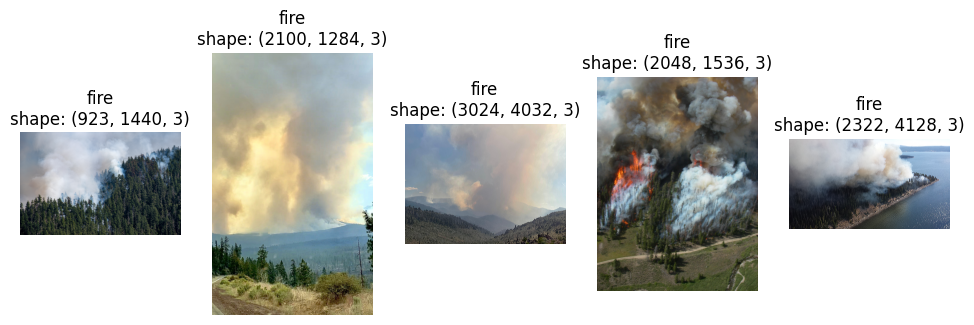

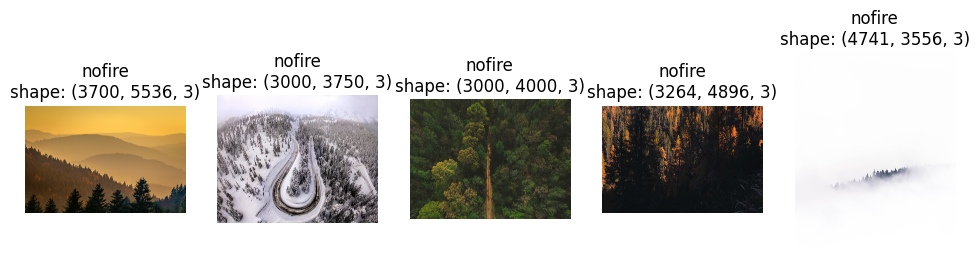

In [6]:
def show_class_samples(class_label, n=5):
    plt.figure(figsize=(12, 6))
    class_path = os.path.join(train_dir, class_label)
    for i in range(n):
        img_name = os.listdir(class_path)[i]
        img_path = os.path.join(class_path, img_name)
        img = plt.imread(img_path)
        plt.subplot(1, n, i+1)
        plt.imshow(img)
        plt.title(f'{class_label}\nshape: {img.shape}')
        plt.axis('off')
    plt.show()

show_class_samples('fire')
show_class_samples('nofire')

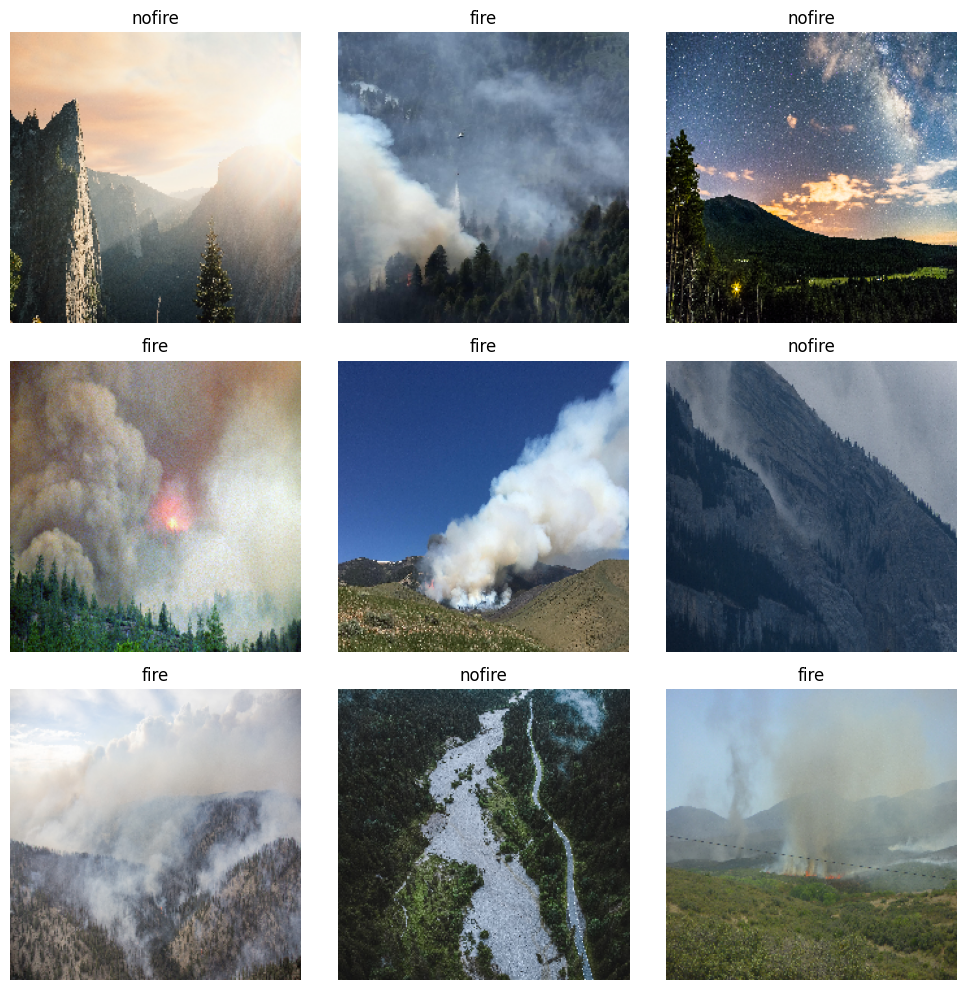

In [7]:
# Random Grid View
from tensorflow.keras.utils import load_img
import random

plt.figure(figsize=(10, 10))
for i in range(9):
    class_name = random.choice(classes)
    class_path = os.path.join(train_dir, class_name)
    img_name = random.choice(os.listdir(class_path))
    img_path = os.path.join(class_path, img_name)
    img = load_img(img_path, target_size=(224, 224))

    plt.subplot(3, 3, i+1)
    plt.imshow(img)
    plt.title(class_name)
    plt.axis('off')

plt.tight_layout()
plt.show()

# 4. Data augmentation & preprocessing

In [9]:
#data augmentation and pre processing

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Augmentation for Training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,
    brightness_range=(0.8, 1.2),
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Only Rescaling for Validation and Testing
val_test_datagen = ImageDataGenerator(rescale=1./255)

# Load Generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False  # for accurate test predictions/metrics
)
#I chose 224x224 as it is the standard input size for many pre-trained CNN architectures.

Found 1887 images belonging to 2 classes.
Found 402 images belonging to 2 classes.
Found 410 images belonging to 2 classes.


## 🧱 5. Building the Deep Learning Model

### 📐 Convolutional Neural Network (CNN) Architecture

The CNN model is built to classify input images into two categories: **`fire`** and **`nofire`**.

- Three convolutional layers are used, each with an increasing number of filters to progressively extract complex features.
- Each convolutional block is followed by **MaxPooling** to downsample the spatial dimensions.
- A **Flatten** layer is used to convert the feature maps into a 1D vector.
- A fully connected **Dense layer** with **Dropout** is added to reduce overfitting.
- The final output layer uses a **Sigmoid activation** function for binary classification (fire vs nofire).


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Define input shape based on your image resizing
input_shape = (224, 224, 3)

model = Sequential()

# Convolutional Block 1
model.add(Conv2D(32, (3,3), activation='relu', input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

# Convolutional Block 2
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

# Convolutional Block 3
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten and Dense Layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # Binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 109, 109, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 52, 52, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,985 (42.61 MB)

 Trainable params: 11,169,537 (42.61 MB)

 Non-trainable params: 448 (1.75 KB)

# Model Training

In [12]:
# Model Training
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    validation_data=val_generator,
    validation_steps=len(val_generator),
    epochs=10
)

Epoch 1/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 952s 16s/step - accuracy: 0.6150 - loss: 9.2090 - val_accuracy: 0.4353 - val_loss: 27.6290
Epoch 2/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 914s 15s/step - accuracy: 0.6477 - loss: 1.9635 - val_accuracy: 0.3881 - val_loss: 26.3535
Epoch 3/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 942s 15s/step - accuracy: 0.6462 - loss: 1.2432 - val_accuracy: 0.3980 - val_loss: 8.0325
Epoch 4/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 914s 15s/step - accuracy: 0.6426 - loss: 0.7594 - val_accuracy: 0.3955 - val_loss: 10.3941
Epoch 5/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 914s 15s/step - accuracy: 0.6603 - loss: 0.7344 - val_accuracy: 0.4776 - val_loss: 6.6702
Epoch 6/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 967s 16s/step - accuracy: 0.6816 - loss: 0.7420 - val_accuracy: 0.5174 - val_loss: 1.3015
Epoch 7/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 946s 15s/step - accuracy: 0.6971 - loss: 0.6459 - val_accuracy: 0.6766 - val_loss: 1.1306
Epoch 8/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 916s 15s/step - accuracy: 0.6902 - loss: 0.6822 - val_accuracy:

In [13]:
# Print training and validation accuracy for each epoch
for i in range(len(history.history['accuracy'])):
    print(f"Epoch {i+1}: "
          f"Train Accuracy = {history.history['accuracy'][i]:.4f}, "
          f"Val Accuracy = {history.history['val_accuracy'][i]:.4f}")

Epoch 1: Train Accuracy = 0.6460, Val Accuracy = 0.4353
Epoch 2: Train Accuracy = 0.6402, Val Accuracy = 0.3881
Epoch 3: Train Accuracy = 0.6555, Val Accuracy = 0.3980
Epoch 4: Train Accuracy = 0.6582, Val Accuracy = 0.3955
Epoch 5: Train Accuracy = 0.6614, Val Accuracy = 0.4776
Epoch 6: Train Accuracy = 0.6826, Val Accuracy = 0.5174
Epoch 7: Train Accuracy = 0.6948, Val Accuracy = 0.6766
Epoch 8: Train Accuracy = 0.6836, Val Accuracy = 0.6642
Epoch 9: Train Accuracy = 0.6836, Val Accuracy = 0.7488
Epoch 10: Train Accuracy = 0.7022, Val Accuracy = 0.7214


# 7. Training plots (accuracy & loss)

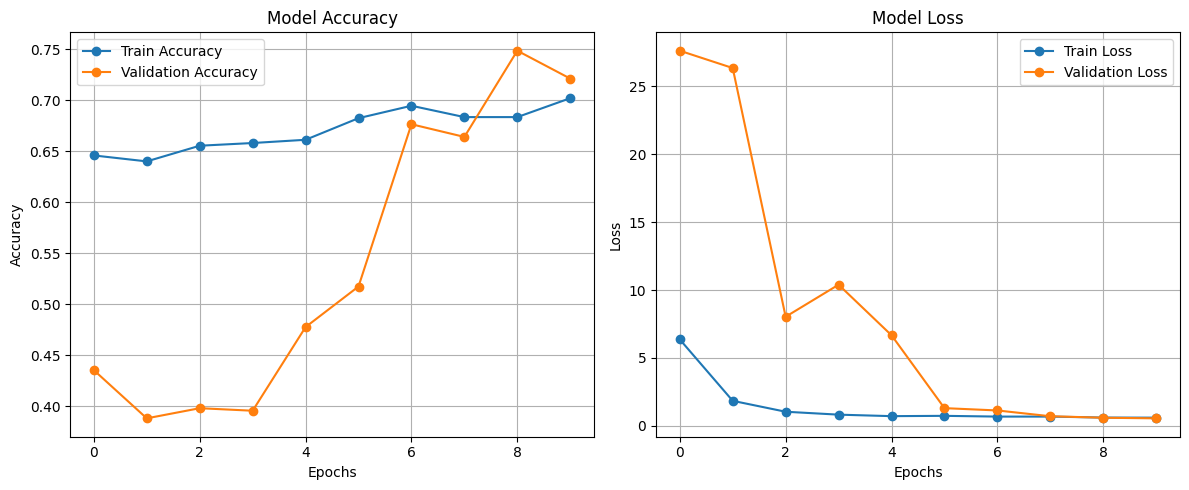

In [14]:
# Accuracy plot
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# 8. Evaluation (confusion matrix)
Generating predictions for input images using the trained model.

13/13 ━━━━━━━━━━━━━━━━━━━━ 135s 11s/step


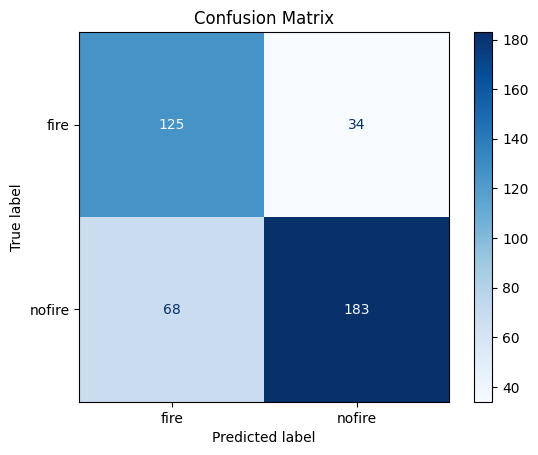

Classification Report:

              precision    recall  f1-score   support

        fire       0.65      0.79      0.71       159
      nofire       0.84      0.73      0.78       251

    accuracy                           0.75       410
   macro avg       0.75      0.76      0.75       410
weighted avg       0.77      0.75      0.75       410



In [16]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Predict on test set
y_pred_prob = model.predict(test_generator)
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert to 0 or 1

# Get true labels
y_true = test_generator.classes

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_generator.class_indices)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))

In [20]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Label mapping
labels = {v: k for k, v in train_generator.class_indices.items()}

def predict_image(img_path):
    # Load and preprocess image
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Predict
    prediction = model.predict(img_array)[0][0]
    predicted_class = 1 if prediction > 0.5 else 0
    class_label = labels[predicted_class]

    # Plot image with prediction
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predicted: {class_label} ({prediction:.2f})")
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


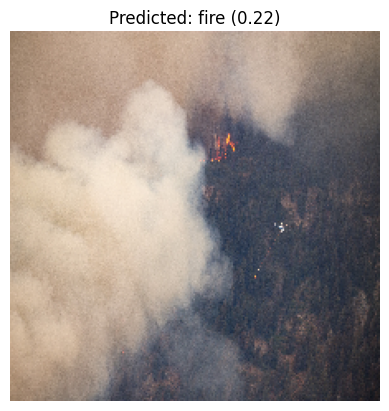

In [23]:
predict_image('/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test/fire/28431975607_7fc4cc466c_o.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


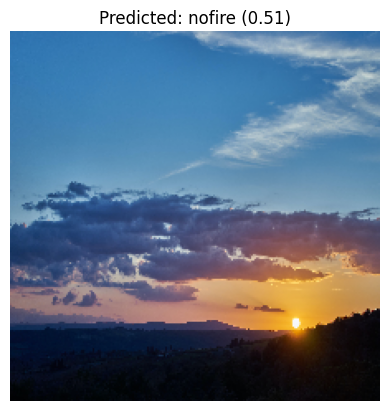

In [22]:
predict_image('/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test/nofire/wolfgang-hasselmann-6yQbmbaucqg-unsplash.jpg')


🔍 Predicting: wolfgang-hasselmann-6yQbmbaucqg-unsplash.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


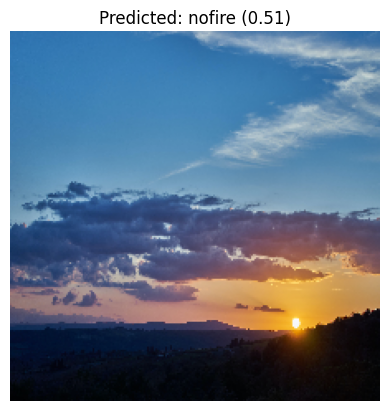


🔍 Predicting: 45922878832_c4755cc402_o.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


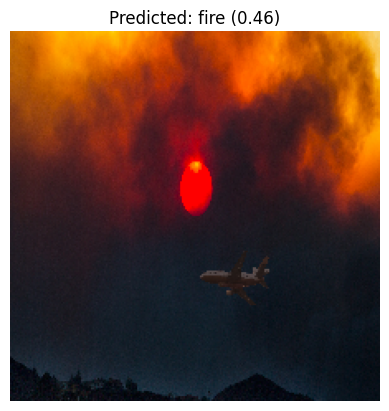


🔍 Predicting: 28431975607_7fc4cc466c_o.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


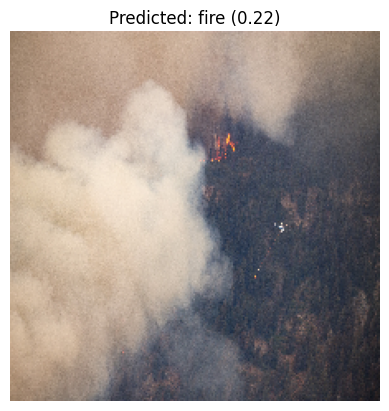


🔍 Predicting: kym-mackinnon-imEpwtWEPPQ-unsplash.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


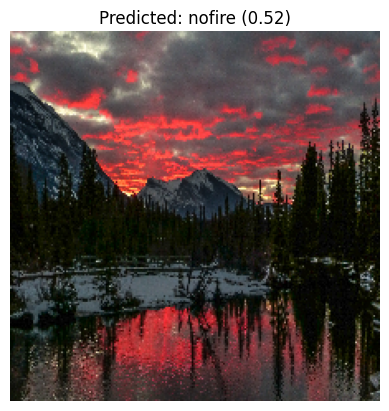


🔍 Predicting: 28431975607_7fc4cc466c_o.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


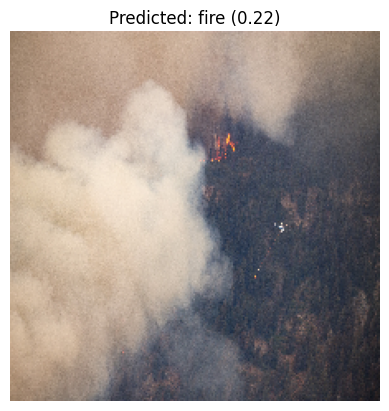

In [24]:
def predict_multiple_verbose(image_list):
    for path in image_list:
        print(f"\n🔍 Predicting: {os.path.basename(path)}")
        predict_image(path)


image_paths = [
    "/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test/nofire/wolfgang-hasselmann-6yQbmbaucqg-unsplash.jpg",
    "/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test/fire/45922878832_c4755cc402_o.jpg",
    "/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test/fire/28431975607_7fc4cc466c_o.jpg",
    "/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test/nofire/kym-mackinnon-imEpwtWEPPQ-unsplash.jpg",
    "/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test/fire/28431975607_7fc4cc466c_o.jpg",

    ]

predict_multiple_verbose(image_paths)

In [26]:
from tensorflow.keras.models import load_model

model.save("forest_fire_detector.h5")

# Load the saved model
model = load_model("forest_fire_detector.h5")

In [ ]:
from google.colab import files

In [31]:
files.download("forest_fire_detector.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>